# Module 15 – SVM Practice Notebook

This practice notebook is focused only on **Support Vector Machine (SVM)** for classification.

You will work with:
- A synthetic **circles** dataset for non linear decision boundaries
- A real world **wine classification** dataset (from `sklearn.datasets.load_wine`)

Complete the `TODO` parts yourself to practice implementing SVM from scratch.

## 1. Setup and Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(42)
plt.rcParams['figure.figsize'] = (6, 4) 


## 2. SVM on Circles Dataset with Different Kernels

In this section you will:
- Generate a **non linearly separable** dataset using `make_circles`
- Train SVM with different kernels: `linear`, `poly`, and `rbf`
- Compare how the decision boundary changes


In [7]:
# 2.1 Generate circles dataset
# TODO: use make_circles to generate a dataset with 500 samples
# Hint: use noise around 0.2 and factor around 0.5

X_circ, y_circ = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)


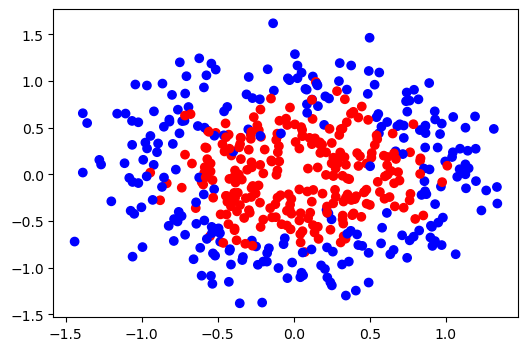

In [10]:
# 2.2 Visualise the raw circles dataset
# TODO: create a scatter plot of the circles dataset
# Hint: use plt.scatter with c=y_circ and cmap='bwr'
plt.scatter(X_circ[:, 0], X_circ[:, 1], c=y_circ, cmap='bwr')


In [23]:
# 2.3 Train test split and scaling
# TODO: split the data into train and test sets
# Then scale the features using StandardScaler

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_circ, y_circ, test_size=0.2, random_state=42)
scaler_circ = StandardScaler()
Xc_train_scaled = scaler_circ.fit_transform(Xc_train)
Xc_test_scaled = scaler_circ.transform(Xc_test)


In [24]:
# Helper function to plot decision boundary for 2D data
def plot_decision_boundary(model, X, y, title='Decision boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.25, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


Linear kernel accuracy: 0.43


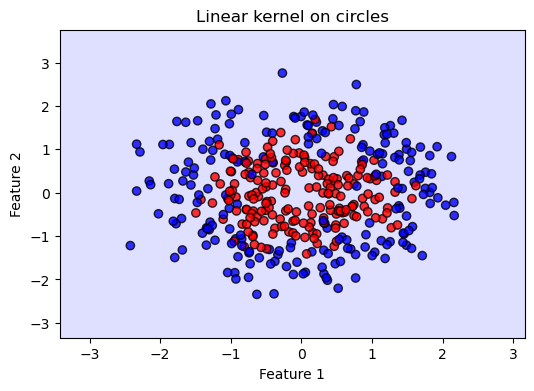

Polynomial kernel accuracy: 0.43


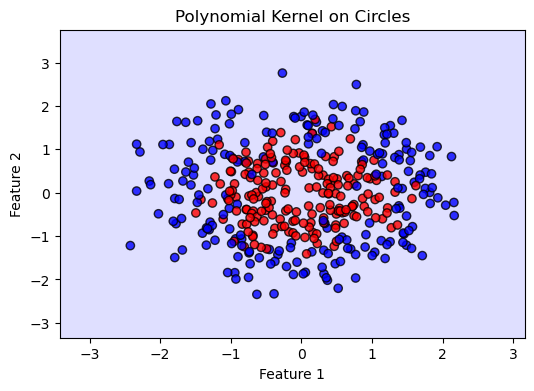

RBF kernel accuracy: 0.87


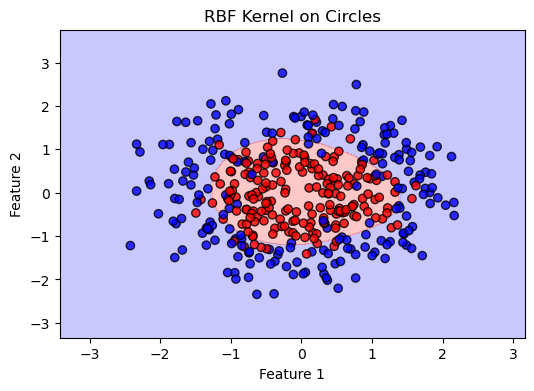

In [27]:
# 2.4 Train linear, polynomial, and RBF SVM on circles data
# TODO: create three SVC models with kernels 'linear', 'poly', and 'rbf'
# Train each on Xc_train_scaled and yc_train
# Then evaluate accuracy on Xc_test_scaled and yc_test
# Finally, call plot_decision_boundary for each model on the TRAIN set

# Example structure (fill in):
svc_lin = SVC(kernel='linear', C=1.0, random_state=42)
svc_lin.fit(Xc_train_scaled, yc_train)
y_pred_lin = svc_lin.predict(Xc_test_scaled)
print('Linear kernel accuracy:', accuracy_score(yc_test, y_pred_lin))
plot_decision_boundary(svc_lin, Xc_train_scaled, yc_train, 'Linear kernel on circles')

# Repeat similarly for polynomial and RBF kernels.
svc_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svc_poly.fit(Xc_train_scaled, yc_train)
y_pred_poly = svc_poly.predict(Xc_test_scaled)
print('Polynomial kernel accuracy:', accuracy_score(yc_test, y_pred_poly))
plot_decision_boundary(svc_poly, Xc_train_scaled, yc_train, 'Polynomial Kernel on Circles')



# Repeat similarly for  RBF kernels.
svc_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_rbf.fit(Xc_train_scaled, yc_train)
y_pred_rbf = svc_rbf.predict(Xc_test_scaled)
print('RBF kernel accuracy:', accuracy_score(yc_test, y_pred_rbf))
plot_decision_boundary(svc_rbf, Xc_train_scaled, yc_train, 'RBF Kernel on Circles')


### Reflection
- কোন kernel circles ডেটাতে সবচেয়ে ভালো কাজ করল?
- linear kernel কেন এই ডেটাতে struggle করে?
- polynomial আর RBF kernel এর boundary shape কেমন পরিবর্তন হয়, বোঝার চেষ্টা করুন।

Linear Kernel: সরল রেখা দিয়ে ডিসিশন বাউন্ডারি তৈরি করে → কিন্তু বৃত্তাকার ডেটায় এটি খুব কাজ করবে না → Accuracy কম হবে

Polynomial Kernel: একটি বহুপদী সমীকরণ দিয়ে বাউন্ডারি তৈরি করে → ভালো কিছু করতে পারে

RBF Kernel: সবচেয়ে ভালো কাজ করে → এটি গোলাকার/জটিল স্পেসে ডিসিশন বাউন্ডারি তৈরি করতে পারে → সবচেয়ে ভালো Accuracy

## 3. SVM on Real Data: Wine Classification

এখানে আমরা `sklearn.datasets.load_wine` ব্যবহার করব।
- এটি একটি **multi class classification** সমস্যা।
- প্রতিটি sample একটি wine, আর target হলো wine এর class (৩ ধরনের)।

উদ্দেশ্য:
- ডেটা explore করা
- SVM train করা
- Accuracy এবং classification report দেখা


In [28]:
# 3.1 Load the wine dataset (Done for you)
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print('Shape of X:', X_wine.shape)
print('Classes:', np.unique(y_wine))
print('Feature names:', wine.feature_names)

Shape of X: (178, 13)
Classes: [0 1 2]
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [29]:
# 3.2 Train test split and scaling
# TODO: split X_wine, y_wine into train and test sets
# Use test_size around 0.2 and random_state=42

# Then apply StandardScaler on the features

Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)
scaler_wine = StandardScaler()
Xw_train_scaled = scaler_wine.fit_transform(Xw_train)
Xw_test_scaled = scaler_wine.transform(Xw_test)


In [30]:
# 3.3 Train an SVM classifier with RBF kernel
# TODO: create an SVC with kernel='rbf', C=1.0, gamma='scale'
# Train it on the scaled training data
# Then predict on the test set and compute accuracy

svc_wine = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_wine.fit(Xw_train_scaled, yw_train)
yw_pred = svc_wine.predict(Xw_test_scaled)
acc_wine = accuracy_score(yw_test, yw_pred)
print(f'Test accuracy (wine, RBF SVM): {acc_wine:.3f}')


Test accuracy (wine, RBF SVM): 1.000


In [31]:
# 3.4 Classification report and confusion matrix
# TODO: print classification_report and confusion_matrix for the wine dataset

print(classification_report(yw_test, yw_pred))
print(confusion_matrix(yw_test, yw_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


### Optional Extension
- C এবং gamma এর ভ্যালু পরিবর্তন করে দেখুন accuracy কিভাবে বদলায়।
- বিভিন্ন kernel (linear, poly, rbf) ব্যবহার করে performance compare করুন।

In [32]:
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 'scale']

results = []
for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        model.fit(Xw_train_scaled, yw_train)
        y_pred = model.predict(Xw_test_scaled)
        acc = accuracy_score(yw_test, y_pred)
        results.append({'C': C, 'gamma': gamma, 'accuracy': acc})

df_results = pd.DataFrame(results)
print(df_results.sort_values('accuracy', ascending=False))

      C  gamma  accuracy
1   0.1    0.1  1.000000
5   1.0  scale  1.000000
2   0.1  scale  1.000000
3   1.0   0.01  1.000000
4   1.0    0.1  1.000000
7  10.0    0.1  1.000000
6  10.0   0.01  1.000000
8  10.0  scale  1.000000
0   0.1   0.01  0.777778


## 4. Mini Hyperparameter Experiment (Wine Data)

এখন wine ডেটার জন্য ছোট একটা grid search টাইপ experiment করবেন।
- কয়েকটা C এর ভ্যালু
- কয়েকটা gamma এর ভ্যালু
- সব combination এর জন্য accuracy বের করুন।


In [33]:
# 4.1 Manual loop over C and gamma
# TODO: create small lists for C_values and gamma_values
# For example: C_values = [0.1, 1, 10]
# and gamma_values = [0.01, 0.1, 'scale']

# For each pair (C, gamma), train an RBF SVM on the wine data
# Store the test accuracy in a list of dictionaries
# Finally, convert it to a DataFrame and sort by accuracy

C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 'scale']
results = []
for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        model.fit(Xw_train_scaled, yw_train)
        y_pred = model.predict(Xw_test_scaled)
        acc = accuracy_score(yw_test, y_pred)
        results.append({'C': C, 'gamma': gamma, 'accuracy': acc})

df_results = pd.DataFrame(results)
df_results.sort_values('accuracy', ascending=False)


,C,gamma,accuracy
1,0.1,0.1,1.000000
5,1.0,scale,1.000000
2,0.1,scale,1.000000
3,1.0,0.01,1.000000
4,1.0,0.1,1.000000
7,10.0,0.1,1.000000
6,10.0,0.01,1.000000
8,10.0,scale,1.000000
0,0.1,0.01,0.777778


### Reflection
- কোন C এবং gamma combination সবচেয়ে ভালো কাজ করল?
- খুব বেশি বড় C বা খুব বেশি বড় gamma দিলে কি overfitting মনে হচ্ছে?
- wine ডেটা কি linear SVM এর জন্য যথেষ্ট সহজ, নাকি RBF noticeably ভালো কাজ করছে?


C (Regularization parameter): মডেলকে কতটা স্ট্রিক্ট হতে বলবে (Overfitting vs Underfitting)

Gamma: RBF Kernel এর জন্য গুরুত্বপূর্ণ — এটি নিয়ন্ত্রণ করে যে প্রতিটি সাপোর্ট ভেক্টর কত দূর পর্যন্ত ইফেক্ট ফেলবে

এখানে আমরা বিভিন্ন C এবং gamma এর সমন্বয় ট্রায়াল করে সেরা অ্যাক্যুরেসি বের করছি

## 5. Summary

এই practice notebook এ আপনি:
- circles ডেটাতে বিভিন্ন kernel এর effect দেখেছেন।
- wine ডেটাতে SVM train করে multi class classification করেছেন।
- hyperparameter C এবং gamma এর impact বুঝেছেন।

এগুলো clear হলে SVM নিয়ে আপনার হাতে কলমে practice ভালোই হয়ে যাবে।


🔍 সাধারণ প্রশ্ন ও উত্তর (FAQ - Bangla)
❓ Linear Kernel কেন কাজ করে না Circles ডেটায়?

কারণ বৃত্তাকার ডেটা রেখার মাধ্যমে ভালোভাবে বিভাজন করা যায় না। Linear Kernel শুধু সরল রেখা দিয়ে ডিসিশন বাউন্ডারি তৈরি করে।

❓ RBF Kernel কি?

RBF (Radial Basis Function) Kernel একটি গোলাকার ফাংশন যা জটিল আকারের ডেটা যেমন বৃত্ত, ঘূর্ণনশীল প্যাটার্ন ইত্যাদিকে ভালোভাবে শেখতে পারে।

❓ C এবং Gamma এর ভূমিকা কি?

C: মডেলকে কতটা সঠিক ক্লাসিফিকেশনে বাধ্য করবে (বেশি C → কম ভুল সহ্য করে, ওভারফিটিং হতে পারে)

Gamma: প্রতিটি সাপোর্ট ভেক্টরের ইনফ্লুয়েন্স কতদূর পর্যন্ত থাকবে (বেশি gamma → আশেপাশের পয়েন্টের ওপর বেশি নির্ভরশীল)



## 🔍 আরও সাধারণ প্রশ্ন ও উত্তর (FAQ - Bangla)

---

### ❓ **SVM কি?**

> **SVM (Support Vector Machine)** হলো একটি **Supervised Learning** অ্যালগরিদম যা মূলত **ক্লাসিফিকেশন** (এবং রিগ্রেশনও) করতে ব্যবহৃত হয়। এটি ডেটা পয়েন্টগুলোকে দুইটি শ্রেণির মধ্যে **সবচেয়ে ভালো সম্ভাব্য সীমানা (margin)** দিয়ে আলাদা করার চেষ্টা করে। এই সীমানা তৈরি করতে এমন কিছু **Support Vector** বা গুরুত্বপূর্ণ পয়েন্ট ব্যবহার করা হয় যা ডিসিশন বাউন্ডারিকে প্রভাবিত করে।

---

### ❓ **কেন SVM ব্যবহার করা হয়?**

> SVM ব্যবহার করা হয় কারণ:
- এটি **উচ্চ-ডাইমেনশনাল ডেটায়** ভালো কাজ করে
- এটি **ছোট ডেটাসেটে** ভালো পারফর্ম করে
- **Non-linear ডেটা** কে সঠিকভাবে শ্রেণিবদ্ধ করতে **বিভিন্ন Kernel (যেমন RBF, Polynomial)** ব্যবহার করা যায়
- এটি **সীমানা (Margin)** ম্যাক্সিমাইজ করার মাধ্যমে ভালো Generalization দেয়

---

### ❓ **Kernel কি? এবং এর ভূমিকা কি?**

> **Kernel** হলো একটি ফাংশন যা **ডেটা কে উচ্চতর মাত্রায় ম্যাপ করে** যাতে সেই উচ্চ মাত্রায় ডেটা গুলো **রেখার (বা হাইপারপ্লেনের) মাধ্যমে সহজে আলাদা করা যায়**।

উদাহরণ:
- **Linear Kernel**: সরল রেখা দিয়ে ডিসিশন করে → সরল ডেটার জন্য ভালো
- **Polynomial Kernel**: বহুপদী ফাংশন দিয়ে জটিল আকারের ডেটা শেখাতে পারে
- **RBF (Radial Basis Function) Kernel**: সবচেয়ে জনপ্রিয়, গোলাকার/জটিল ডেটার জন্য ভালো

---

### ❓ **ডেটা স্কেলিং (StandardScaler) কেন দরকার?**

> SVM এ **ফিচারগুলোর স্কেল (মানে পরিসর)** খুব গুরুত্বপূর্ণ। যদি কোনো ফিচারের মান ০-১০০০ হয় আর আরেকটার ০-১ হয়, তাহলে বড় ফিচারটি ডিসিশন নিতে বেশি প্রভাব ফেলবে।  
👉 **StandardScaler** দিয়ে আমরা সব ফিচারকে **গড় = ০, স্ট্যান্ডার্ড ডেভিয়েশন = ১** এ নিয়ে আসি, যাতে সব ফিচার সমান গুরুত্ব পায়।

---

### ❓ **C (Regularization Parameter) কি? এটা কি করে?**

> **C** হলো একটি হাইপারপ্যারামিটার যা বলে যে, **মডেলকে কতটা সঠিকভাবে ক্লাসিফাই করতে হবে**।
- **বড় C (যেমন 10, 100)** → মডেল চায় প্রতিটি পয়েন্টকে ঠিকভাবে ক্লাসিফাই করতে (কম ভুল সহ্য করে) → ওভারফিটিং হতে পারে
- **ছোট C (যেমন 0.01, 0.1)** → মডেল বেশি মার্জিন বজায় রাখতে চায়, কিছু ভুল সহ্য করে → আন্ডারফিটিং হতে পারে

---

### ❓ **Gamma (RBF Kernel এর জন্য) কি?**

> **Gamma** হলো RBF Kernel এর একটি প্যারামিটার যা নিয়ন্ত্রণ করে যে, **প্রতিটি সাপোর্ট ভেক্টর কত দূর পর্যন্ত ইফেক্ট ফেলবে**।
- **বড় Gamma** → সাপোর্ট ভেক্টরের প্রভাব খুব কাছাকাছি পয়েন্টের মধ্যেই সীমাবদ্ধ → মডেল জটিল হয়ে যায়, ওভারফিটিং হতে পারে
- **ছোট Gamma** → সাপোর্ট ভেক্টরের প্রভাব দূরের পয়েন্টের উপরও থাকে → মডেল সরল হয়, আন্ডারফিটিং হতে পারে

---

### ❓ **আমি কি সবসময় RBF Kernel ব্যবহার করব?**

> না, সব সময় নয়।
- যদি ডেটা **রেখার মাধ্যমে সহজে বিভাজ্য হয়** → **Linear Kernel** ভালো
- যদি ডেটা **সামান্য জটিল হয়** → **Polynomial Kernel** চেষ্টা করা যেতে পারে
- যদি ডেটা **খুব জটিল এবং অ-রেখাগত (non-linear)** হয় → **RBF Kernel** ভালো

সব ক্ষেত্রে **ক্রস-ভ্যালিডেশন বা হাইপারপ্যারামিটার টিউনিং** দিয়ে সেরা Kernel বের করা উচিত।

---

### ❓ **আমি কিভাবে জানবো যে মডেলটি Overfitting করছে?**

> Overfitting হলো যখন মডেল **ট্রেনিং ডেটায় খুব ভালো করে (উচ্চ accuracy)** কিন্তু **টেস্ট ডেটায় খুব খারাপ করে (কম accuracy)**।
চিহ্ন:
- Training Accuracy >> Test Accuracy
- Model খুব জটিল (যেমন বড় C + বড় Gamma)

**সমাধান:**
- সঠিক **C এবং Gamma** নির্বাচন করুন
- **ক্রস-ভ্যালিডেশন** ব্যবহার করুন
- **সাধারণীকরণ (Regularization)** বাড়ান (C কমিয়ে)

---

### ❓ **আমি কি সব সময় স্কেল করে ফিচার ব্যবহার করব?**

> হ্যাঁ, বিশেষ করে **SVM এ** ফিচার স্কেলিং খুব গুরুত্বপূর্ণ। কারণ SVM ডিসট্যান্স-ভিত্তিক অ্যালগরিদম এবং ফিচারের পরিসর এক না হলে ভুল ডিসিশন হতে পারে।

সুতরাং:
✅ **সব সময় StandardScaler বা MinMaxScaler ব্যবহার করুন**  
❌ **রয়্যাল ডেটা ব্যবহার করবেন না (যেখানে ফিচারের স্কেল ভিন্ন)**

---

### ❓ **আমি কি একাধিক Kernel ট্রায়াল করব?**

> হ্যাঁ, বিশেষ করে যখন আপনি জানেন না যে ডেটা কি ধরনের (রেখাগত কিনা, জটিল কিনা) — তখন **Linear, Polynomial, RBF** সব কিছু ট্রায়াল করে দেখুন এবং **যেটি ভালো করে তা নির্বাচন করুন**।

---

### ❓ **Confusion Matrix কি?**

> **Confusion Matrix** হলো একটি টেবিল যা দেখায়:
- কতগুলো পয়েন্ট **সঠিকভাবে ক্লাসিফাই হয়েছে**
- কোন ক্লাসকে **অন্য ক্লাস হিসেবে ভুল করা হয়েছে**

এটি থেকে বোঝা যায়:
- কোন ক্লাসটি বেশি ভুল হচ্ছে
- Model কোন দিকে দুর্বল

---

### ❓ **Classification Report কি?**

> **Classification Report** দেখায়:
- **Precision**: যতগুলো পজিটিভ বলা হয়েছে তার মধ্যে কতগুলো আসলে পজিটিভ
- **Recall**: আসল পজিটিভ কতগুলো ঠিকভাবে ধরা হয়েছে
- **F1-Score**: Precision এবং Recall এর ভারসাম্যপূর্ণ মান
- **Support**: প্রতিটি ক্লাসে কতগুলো স্যাম্পল আছে

---

## 🔧 সাধারণ টিপস (Tips):

| টিপ | বর্ণনা |
|-----|--------|
| 🔹 সবসময় ডেটা স্কেল করুন | SVM ফিচারের স্কেলের ওপর নির্ভরশীল |
| 🔹 হাইপারপ্যারামিটার টিউন করুন | C, Gamma এর সঠিক মান খুঁজে বের করুন |
| 🔹 ভিজ্যুয়ালাইজ করুন (যদি সম্ভব হয়) | বিশেষ করে Circles ডেটায় Decision Boundary দেখা ভালো |
| 🔹 বিভিন্ন Kernel ট্রায়াল করুন | ডেটার ধরন অনুযায়ী সেরা Kernel বেছে নিন |
| 🔹 Cross-Validation ব্যবহার করুন | ভালো জেনারেলাইজড মডেল পাবেন |
